In [ ]:
# The modules we're going to use
from __future__ import print_function
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt

# When you execute a code to plot with a simple SHIFT-ENTER, the plot will be shown directly under the code cell
%matplotlib inline

# Reference: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html
# Load data from scikit-learn
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

In [ ]:
train_data, valid_data, train_target, valid_target, = train_test_split(data,(target[:, np.newaxis]), test_size = 0.2, random_state = 42)
train_data, test_data, train_target, test_target = train_test_split(train_data, (train_target), test_size = 0.2, random_state = 42)

print('train_data.shape: ', train_data.shape)
print('train_target.shape: ', train_target.shape)
print()

print('valid_data.shape: ', valid_data.shape)
print('valid_target.shape: ', valid_target.shape)
print()

print('test_data.shape: ', test_data.shape)
print('test_target.shape: ', test_target.shape)
print()


train_data.shape:  (282, 10)
train_target.shape:  (282, 1)

valid_data.shape:  (89, 10)
valid_target.shape:  (89, 1)

test_data.shape:  (71, 10)
test_target.shape:  (71, 1)



Weights: 
 [[   7.0366653  -246.78306312  547.24888098  324.79496319 -921.9697261
   472.19859546  172.52537595  292.87021204  764.64280056   83.23467618]]
Bias: 
 [147.83633605]

training loss using sklearn - MSE: 2898.79
validation loss using sklearn - MSE: 2910.86
testing loss using sklearn - MSE: 2848.75

training loss using CS4210-style - MSE: 1449.39
validation loss using CS4210-style - MSE: 1455.43
testing loss using CS4210-style - MSE: 1424.38




training score: 0.531
validation score: 0.451
testing score: 0.470


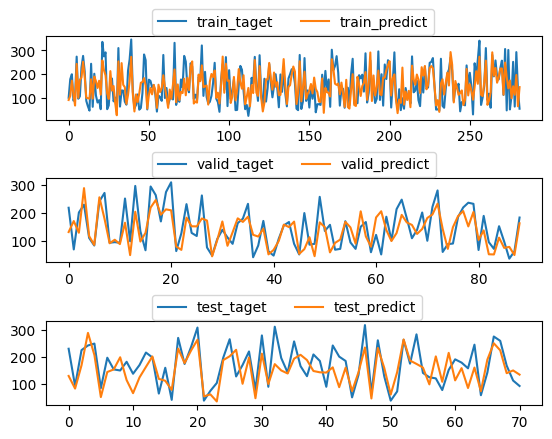

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create a Linear Regression model
lr = LinearRegression()

# Fit the model on the training data
lr.fit(train_data, train_target)

# Print the model's weights and bias
print('Weights: \n', lr.coef_)
print('Bias: \n', lr.intercept_)
print()

# Import mean_squared_error function from sklearn.metrics
from sklearn.metrics import mean_squared_error

# Calculate and print training, validation, and testing loss using sklearn's MSE
print("training loss using sklearn - MSE: %.2f" % (mean_squared_error(train_target, lr.predict(train_data))))
print("validation loss using sklearn - MSE: %.2f" % (mean_squared_error(valid_target, lr.predict(valid_data))))
print("testing loss using sklearn - MSE: %.2f" % (mean_squared_error(test_target, lr.predict(test_data))))
print()

# Calculate and print training, validation, and testing loss using CS4210-style MSE
print("training loss using CS4210-style - MSE: %.2f" % (np.mean((lr.predict(train_data) - train_target) ** 2)/2))
print("validation loss using CS4210-style - MSE: %.2f" % (np.mean((lr.predict(valid_data) - valid_target) ** 2)/2))
print("testing loss using CS4210-style - MSE: %.2f" % (np.mean((lr.predict(test_data) - test_target) ** 2)/2))
print()

# Create a figure for plotting
fig = plt.figure()
fig.subplots_adjust(hspace=.7)

# Create subplots for training, validation, and testing data
plt.subplot(3,1,1)
plt.plot(np.arange(train_target.shape[0]), train_target, label = "train_taget")
plt.plot(np.arange(train_target.shape[0]), lr.predict(train_data), label = "train_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3,1,2)
plt.plot(np.arange(valid_target.shape[0]), valid_target, label = "valid_taget")
plt.plot(np.arange(valid_target.shape[0]), lr.predict(valid_data), label = "valid_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3,1,3)
plt.plot(np.arange(test_target.shape[0]), test_target, label = "test_taget")
plt.plot(np.arange(test_target.shape[0]), lr.predict(test_data), label = "test_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

# Print the training, validation, and testing scores
print("training score: %.3f" % lr.score(train_data, train_target))
print("validation score: %.3f" % lr.score(valid_data, valid_target))
print("testing score: %.3f" % lr.score(test_data, test_target))

Weights: 
 [[  0.32780955 -11.76160156  26.01339425  15.64886811 -44.19901855
   22.96965407   7.80655844  13.89718822  34.93308867   3.93104588]]
Bias: 
 [149.78368794]


training loss using CS4210-style - MSE: 1459.86
validation loss using CS4210-style - MSE: 1445.12
testing loss using CS4210-style - MSE: 1438.88





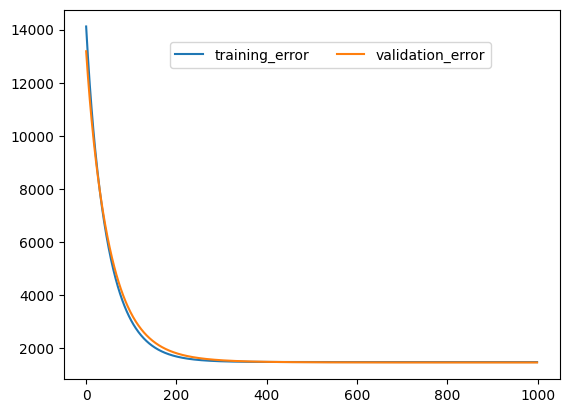

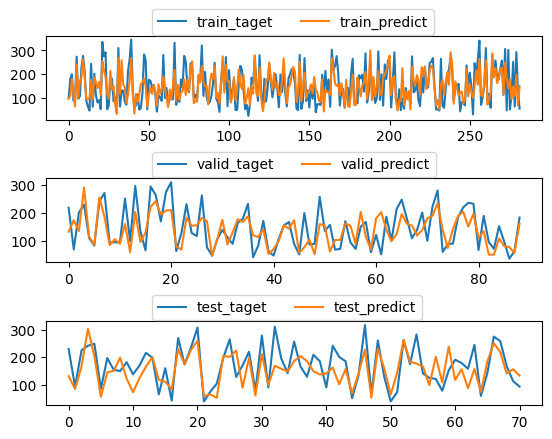

In [ ]:
learning_rate = 0.01   # learning rate
numItrs = 1000   # number of iterations

from sklearn import preprocessing

# Scale the data using StandardScaler
scaler = preprocessing.StandardScaler().fit(train_data)
train_data = scaler.transform(train_data)
valid_data = scaler.transform(valid_data)
test_data = scaler.transform(test_data)

# Add an intercept term to the data
train_data_intercept = np.insert(train_data, 0, 1, axis = 1)
valid_data_intercept = np.insert(valid_data, 0, 1, axis = 1)
test_data_intercept = np.insert(test_data, 0, 1, axis = 1)

# Define a custom model function
def myModelFunction(X, w):
  return np.dot(X, w)

# Define a custom loss function
def myLossFunction(X, w, y):
  return np.mean((myModelFunction(X, w) - y) ** 2)/2

# Define a custom training loop
def myTrainingLoop(train_data, train_target, valid_data, valid_target, learning_rate, numItrs):
  train_losses = np.zeros((numItrs, 1))
  valid_losses = np.zeros((numItrs, 1))
  w = np.random.normal(0, 1, (train_data.shape[1], 1))

  for i in range(numItrs):
    Xw = np.dot(train_data, w)
    grad = -1 * np.dot(train_data.T, (train_target - Xw)) / (train_data.shape[0])

    w += learning_rate * (-1 * grad)

    train_losses[i] = myLossFunction(train_data, w, train_target)
    valid_losses[i] = myLossFunction(valid_data, w, valid_target)

  return w, train_losses, valid_losses

# Train the model using the custom training loop
w, train_losses, valid_losses = myTrainingLoop(train_data_intercept, train_target, valid_data_intercept, valid_target, learning_rate, numItrs)

# Create a Linear Regression model for comparison
lr = LinearRegression()
lr.fit(train_data, train_target)

# Print the model's weights and bias
print('Weights: \n', lr.coef_)
print('Bias: \n', lr.intercept_)
print()

# Plot training and validation losses
plt.plot(np.arange(numItrs), train_losses, label = "training_error")
plt.plot(np.arange(numItrs), valid_losses, label = "validation_error")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

# Calculate and print training, validation, and testing losses using custom loss function
print("training loss using CS4210-style - MSE: %.2f" % (myLossFunction(train_data_intercept, w, train_target)))
print("validation loss using CS4210-style - MSE: %.2f" % (myLossFunction(valid_data_intercept, w, valid_target)))
print("testing loss using CS4210-style - MSE: %.2f" % (myLossFunction(test_data_intercept, w, test_target)))
print()

# Create a figure for plotting
fig = plt.figure()
fig.subplots_adjust(hspace=.7)

# Create subplots for training, validation, and testing data
plt.subplot(3,1,1)
plt.plot(np.arange(train_target.shape[0]), train_target, label = "train_taget")
plt.plot(np.arange(train_target.shape[0]), myModelFunction(train_data_intercept, w), label = "train_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3,1,2)
plt.plot(np.arange(valid_target.shape[0]), valid_target, label = "valid_taget")
plt.plot(np.arange(valid_target.shape[0]), myModelFunction(valid_data_intercept, w), label = "valid_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3,1,3)
plt.plot(np.arange(test_target.shape[0]), test_target, label = "test_taget")
plt.plot(np.arange(test_target.shape[0]), myModelFunction(test_data_intercept, w), label = "test_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)

Weights: 
 [[  0.32780955 -11.76160156  26.01339425  15.64886811 -44.19901855
   22.96965407   7.80655844  13.89718822  34.93308867   3.93104588]]
Bias: 
 [149.78368794]


training loss: 1465.83
validation loss: 1440.66
testing loss: 1432.58






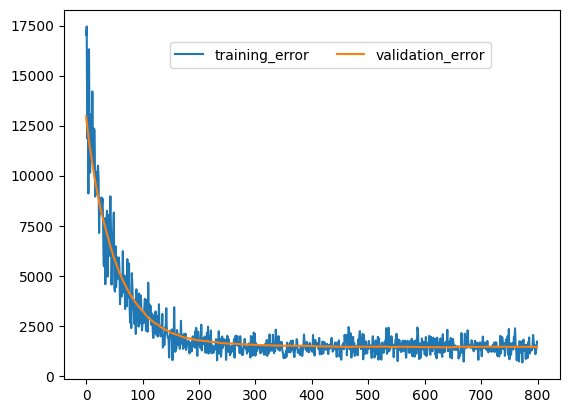

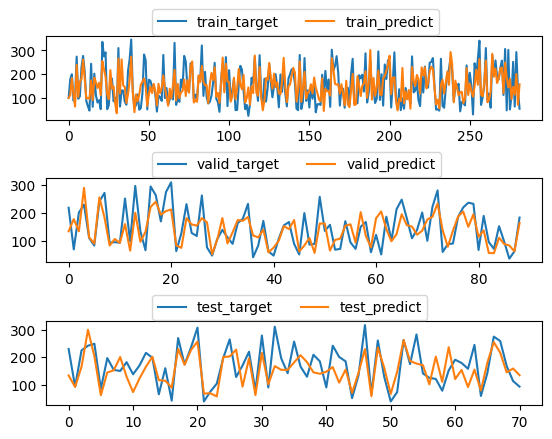

In [ ]:
learning_rate = 0.01   # learning rate
batch_size = 32 # number of data samples in a batch
epochs = 800   # number of epochs

# Define a stochastic gradient descent training function
def stochastic(train_data, train_target, valid_data, valid_target, learning_rate, epochs, batch_size):
  # Initialize arrays to store training and validation losses
  train_losses = np.zeros((epochs, 1))
  valid_losses = np.zeros((epochs, 1))

  # Initialize model weights with random values
  w = np.random.normal(0, 1, (train_data.shape[1], 1))

  # Perform stochastic gradient descent for the specified number of epochs
  for i in range(epochs):
    # Randomly sample a batch of data points
    batch_indices = np.random.choice(train_data.shape[0], batch_size, replace = False)
    batch_data = train_data[batch_indices]
    batch_target = train_target[batch_indices]

    # Compute the gradient with respect to the batch
    grad = -1 * np.dot(batch_data.T, (batch_target-(np.dot(batch_data,w)))) / (batch_data.shape[0])

    # Update model weights using the learning rate and gradient
    w += learning_rate * (-1 * grad)

    # Calculate and store training and validation losses for this epoch
    train_losses[i] = myLossFunction(batch_data, w, batch_target)
    valid_losses[i] = myLossFunction(valid_data, w, valid_target)

  return w, train_losses, valid_losses

# Train the model using stochastic gradient descent
w, train_losses, valid_losses = stochastic(train_data_intercept, train_target, valid_data_intercept, valid_target, learning_rate, epochs, batch_size)

# Create a Linear Regression model for comparison
lr = LinearRegression()
lr.fit(train_data, train_target)

# Print the model's weights and bias
print('Weights: \n', lr.coef_)
print('Bias: \n', lr.intercept_)
print()

# Plot training and validation losses
plt.plot(np.arange(epochs), train_losses, label ="training_error")
plt.plot(np.arange(epochs), valid_losses, label ="validation_error")
plt.legend(bbox_to_anchor = (0.2,0.93), ncol = 2)
print()

# Calculate and print training, validation, and testing losses using custom loss function
print("training loss: %.2f" % (myLossFunction(train_data_intercept, w, train_target)))
print("validation loss: %.2f" % (myLossFunction(valid_data_intercept, w, valid_target)))
print("testing loss: %.2f" % (myLossFunction(test_data_intercept, w, test_target)))
print()

# Create a figure for plotting
fig = plt.figure()
fig.subplots_adjust(hspace=.7)

# Create subplots for training, validation, and testing data
plt.subplot(3,1,1)
plt.plot(np.arange(train_target.shape[0]), train_target, label ="train_target")
plt.plot(np.arange(train_target.shape[0]), myModelFunction(train_data_intercept, w), label = "train_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3,1,2)
plt.plot(np.arange(valid_target.shape[0]), valid_target, label ="valid_target")
plt.plot(np.arange(valid_target.shape[0]), myModelFunction(valid_data_intercept, w), label = "valid_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()

plt.subplot(3,1,3)
plt.plot(np.arange(test_target.shape[0]), test_target, label ="test_target")
plt.plot(np.arange(test_target.shape[0]), myModelFunction(test_data_intercept, w), label = "test_predict")
plt.legend(bbox_to_anchor = (0.2, 0.93), ncol = 2)
print()